In [122]:
import pandas as pd

df = pd.read_csv('../data/diabetic_data.csv')

df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
print('Number of Rows = ' + str(df.shape[0]))
print('Number of Columns = ' + str(df.shape[1]))

Number of Rows = 101766
Number of Columns = 50


In [5]:
print(df.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
print(df.time_in_hospital.describe())

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64


In [7]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [8]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

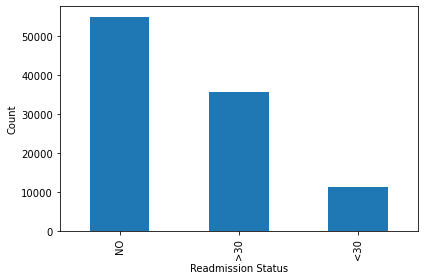

In [26]:
import matplotlib
from matplotlib import pylab as plt

pd.value_counts(df['readmitted']).plot.bar()
plt.ylabel('Count')
plt.xlabel('Readmission Status')
plt.tight_layout()
plt.savefig('../figures/readmission_barplot.pdf')

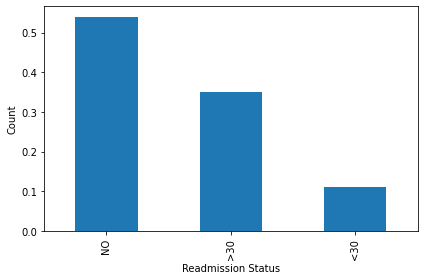

In [34]:
pd.value_counts(df['readmitted'],normalize=True).plot.bar()
plt.ylabel('Count')
plt.xlabel('Readmission Status')
plt.tight_layout()
plt.savefig('../figures/readmission_barplot_norm.pdf')

In [12]:
df['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [88]:
count_matrix = df.groupby(['weight', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

print(count_matrix_norm)

readmitted       <30       >30        NO
weight                                  
>200             NaN  1.000000       NaN
[0-25)      0.166667  0.645833  0.187500
[100-125)   0.107200  0.467200  0.425600
[125-150)   0.082759  0.475862  0.441379
[150-175)   0.085714  0.457143  0.457143
[175-200)   0.090909  0.454545  0.454545
[25-50)     0.082474  0.432990  0.484536
[50-75)     0.117057  0.433668  0.449275
[75-100)    0.114521  0.496257  0.389222


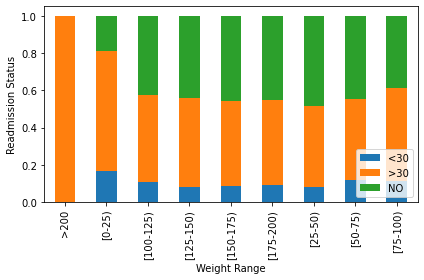

In [89]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Weight Range')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_weight_stacked.pdf')

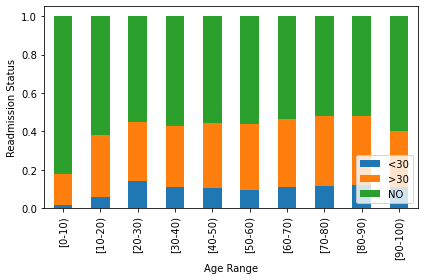

In [87]:
count_matrix = df.groupby(['age', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Age Range')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_age_stacked.pdf')

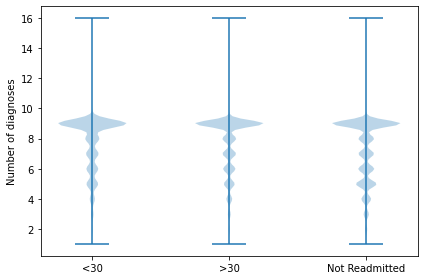

In [53]:
dataset = [df[df['readmitted']=='<30']['number_diagnoses'].values,
           df[df['readmitted']=='>30']['number_diagnoses'].values,
           df[df['readmitted']=='NO']['number_diagnoses'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of diagnoses')
plt.tight_layout()
plt.savefig('../figures/readmitted_diagnoses_violin.pdf')

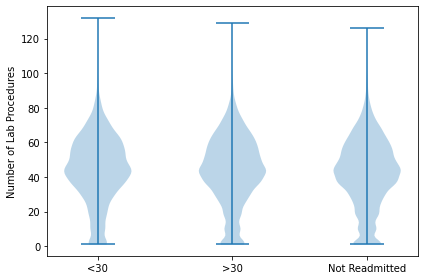

In [65]:
dataset = [df[df['readmitted']=='<30']['num_lab_procedures'].values,
           df[df['readmitted']=='>30']['num_lab_procedures'].values,
           df[df['readmitted']=='NO']['num_lab_procedures'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Lab Procedures')
plt.tight_layout()
plt.savefig('../figures/readmitted_labprocedures_violin.pdf')

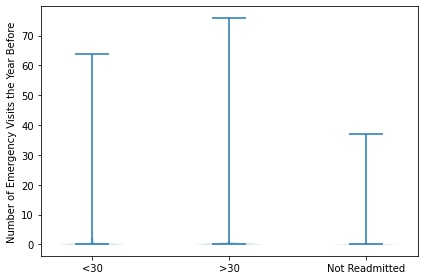

In [52]:
dataset = [df[df['readmitted']=='<30']['number_emergency'].values,
           df[df['readmitted']=='>30']['number_emergency'].values,
           df[df['readmitted']=='NO']['number_emergency'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Emergency Visits the Year Before')
plt.tight_layout()
plt.savefig('../figures/readmitted_emergency_violin.pdf')

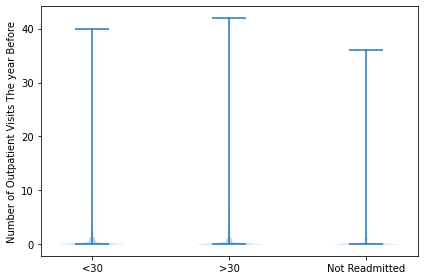

In [51]:
dataset = [df[df['readmitted']=='<30']['number_outpatient'].values,
           df[df['readmitted']=='>30']['number_outpatient'].values,
           df[df['readmitted']=='NO']['number_outpatient'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Outpatient Visits The year Before')
plt.tight_layout()
plt.savefig('../figures/readmitted_outpatient_violin.pdf')

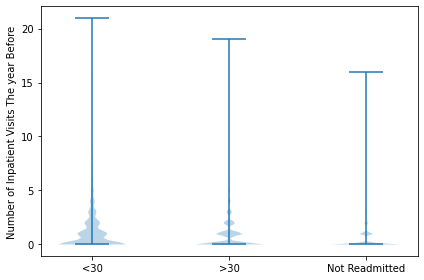

In [50]:
dataset = [df[df['readmitted']=='<30']['number_inpatient'].values,
           df[df['readmitted']=='>30']['number_inpatient'].values,
           df[df['readmitted']=='NO']['number_inpatient'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Inpatient Visits The year Before')
plt.tight_layout()
plt.savefig('../figures/readmitted_inpatient_violin.pdf')

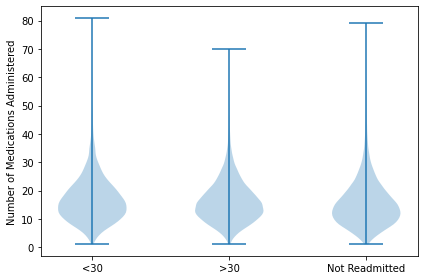

In [49]:
dataset = [df[df['readmitted']=='<30']['num_medications'].values,
           df[df['readmitted']=='>30']['num_medications'].values,
           df[df['readmitted']=='NO']['num_medications'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Medications Administered')
plt.tight_layout()
plt.savefig('../figures/readmitted_medications_violin.pdf')

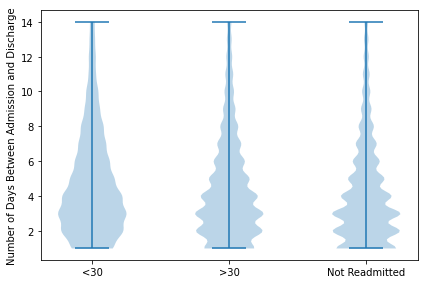

In [58]:
dataset = [df[df['readmitted']=='<30']['time_in_hospital'].values,
           df[df['readmitted']=='>30']['time_in_hospital'].values,
           df[df['readmitted']=='NO']['time_in_hospital'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Days Between Admission and Discharge')
plt.tight_layout()
plt.savefig('../figures/readmitted_timeinhospital_violin.pdf')

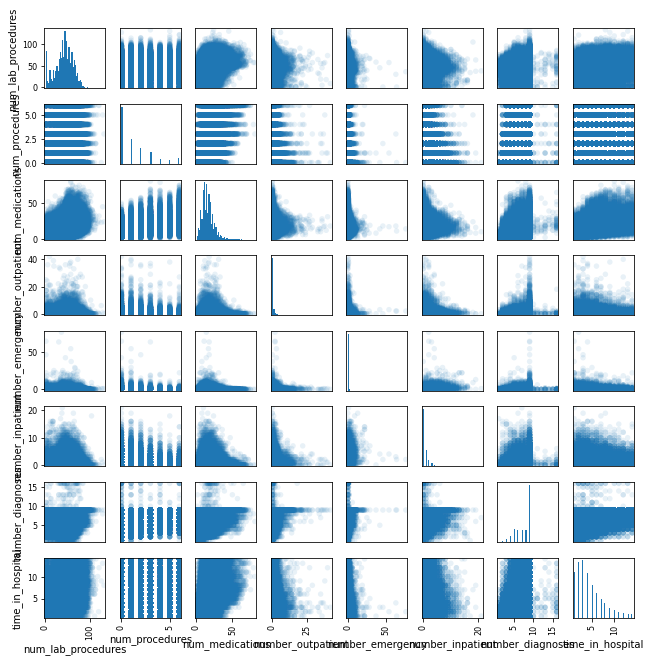

In [61]:
numcols =['num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses','time_in_hospital']
pd.plotting.scatter_matrix(df[numcols], figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.tight_layout()
plt.savefig('../figures/numericaldata_scattermatrix.jpg')

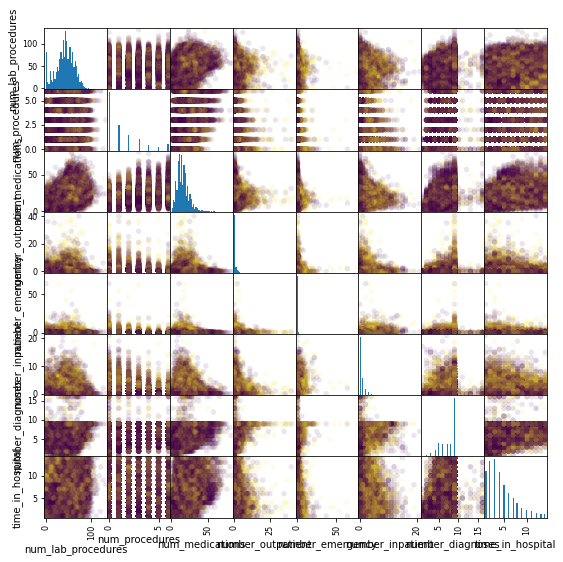

In [119]:
pd.plotting.scatter_matrix(df[numcols], figsize=(9, 9),c = pd.get_dummies(df['readmitted']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.tight_layout
plt.savefig('../figures/numericaldata_readmitted_scattermatrix.jpg')

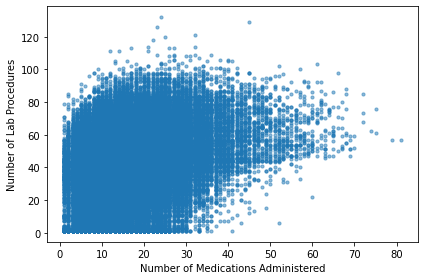

In [66]:
df.plot.scatter('num_medications','num_lab_procedures',alpha=0.5,s=10)
plt.ylabel('Number of Lab Procedures')
plt.xlabel('Number of Medications Administered')
plt.tight_layout()
plt.savefig('../figures/medications_labprocedures_scatter.pdf')

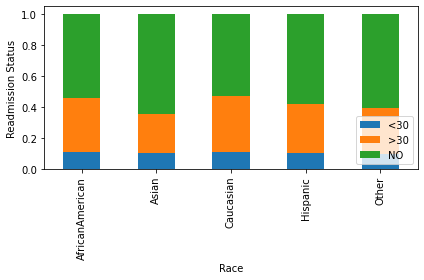

In [73]:
count_matrix = df.groupby(['race', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Race')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_race_stacked.pdf')

In [78]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

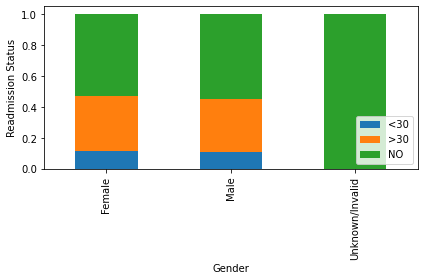

In [77]:
count_matrix = df.groupby(['gender', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Gender')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_gender_stacked.pdf')

In [76]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

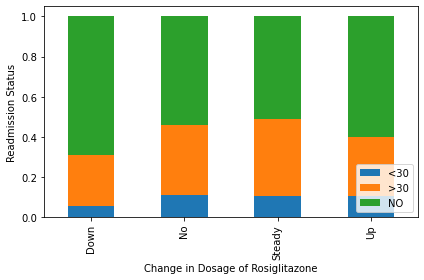

In [93]:
count_matrix = df.groupby(['rosiglitazone', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Change in Dosage of Rosiglitazone')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_rosiglitazone_stacked.pdf')

In [85]:
df['rosiglitazone'].value_counts()

No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64

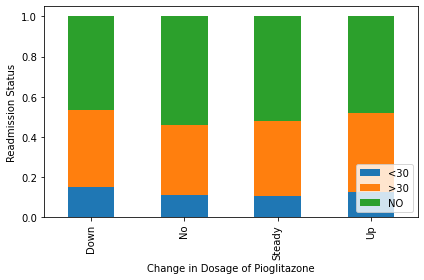

In [92]:
count_matrix = df.groupby(['pioglitazone', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Change in Dosage of Pioglitazone')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_pioglitazone_stacked.pdf')

In [124]:
import numpy as np
df.replace("?",np.nan,inplace=True)

In [95]:
numcols = ['num_lab_procedures','num_procedures','num_medications','number_outpatient',
           'number_emergency','number_inpatient','number_diagnoses','time_in_hospital']
catcols = ['race','gender','age','weight','admission_type_id','discharge_disposition_id',
           'admission_source_id','payer_code','medical_specialty','diag_1','diag_2','diag_3',
           'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide',
           'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
           'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
           'tolazamide','insulin','glyburide-metformin',
           'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
           'metformin-pioglitazone','change','diabetesMed']
print(len(numcols))
print(len(catcols))

8
37


In [125]:
df[numcols].isnull().sum()

num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
time_in_hospital      0
dtype: int64

In [126]:
df[catcols].isnull().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
payer_code                  40256
medical_specialty           49949
diag_1                         21
diag_2                        358
diag_3                       1423
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin       

In [127]:
df['race'] = df['race'].fillna('Unknown')
df['weight'] = df['weight'].fillna('Unknown')
df['payer_code'] = df['payer_code'].fillna('Unknown')
df['medical_specialty'] = df['medical_specialty'].fillna('Unknown')
df['diag_1'] = df['diag_1'].fillna('Unknown')
df['diag_2'] = df['diag_2'].fillna('Unknown')
df['diag_3'] = df['diag_2'].fillna('Unknown')

In [138]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ordinal_ftrs=['age']
ordinal_cats=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
               '[60-70)', '[70-80)', '[80-90)', '[90-100)']]
onehot_ftrs= ['race','gender','weight','admission_type_id','discharge_disposition_id',
           'admission_source_id','payer_code','medical_specialty','diag_1','diag_2','diag_3',
           'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide',
           'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
           'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
           'tolazamide','insulin','glyburide-metformin',
           'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
           'metformin-pioglitazone','change','diabetesMed']
std_ftrs=['num_lab_procedures','num_procedures','num_medications','number_outpatient',
           'number_emergency','number_inpatient','number_diagnoses','time_in_hospital']


X = df[ordinal_ftrs+onehot_ftrs+std_ftrs]
y = df['readmitted']
group_on = df['patient_nbr']


gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=17)

preprocessor = ColumnTransformer(
    transformers=[
    ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
    ('onehot', OneHotEncoder(sparse=True,handle_unknown='ignore'), onehot_ftrs),
    ('std', StandardScaler(), std_ftrs)])
    
clf = Pipeline(steps=[('preprocessor', preprocessor)])

for other_idx, test_idx in gss.split(X, y, group_on):
    X_other = X.iloc[other_idx]
    y_other = y.iloc[other_idx]
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]
    group_on_other = group_on.iloc[other_idx]    
    for train_index, val_index in gss.split(X_other, y_other, group_on_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        group_on_train = group_on_other.iloc[train_index]
        
        X_train_prep = clf.fit_transform(X_train)
        X_val_prep = clf.transform(X_val)
        X_test_prep = clf.transform(X_test)

print(X.shape)
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

print("Preprocessed X_train:",X_train_prep.shape)
print("Preprocessed X_val:",X_val_prep.shape)
print("Preprocessed X_test:",X_test_prep.shape)

(101766, 45)
(20559, 45)
(64922, 45)
(16285, 45)
Preprocessed X_train: (64922, 2297)
Preprocessed X_val: (16285, 2297)
Preprocessed X_test: (20559, 2297)


In [113]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [131]:
preprocessor2 = ColumnTransformer(
    transformers=[
    ('onehot', OneHotEncoder(sparse=True,handle_unknown='ignore'), ['race','gender','age','weight','admission_type_id','discharge_disposition_id',
           'admission_source_id','payer_code','medical_specialty',
           'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide',
           'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
           'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
           'tolazamide','insulin','glyburide-metformin',
           'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
           'metformin-pioglitazone','change','diabetesMed']),
    ('std', StandardScaler(), numcols)])
    
clf2 = Pipeline(steps=[('preprocessor', preprocessor2)])
    
X_train_prep2 = clf2.fit_transform(X_train)
X_val_prep2 = clf2.transform(X_val)
X_test_prep2 = clf2.transform(X_test)

print("Preprocessed sizes if diag1,diag2 and diag3 are exclued-")
print("Preprocessed X_train:",X_train_prep2.shape)
print("Preprocessed X_val:",X_val_prep2.shape)
print("Preprocessed X_test:",X_test_prep2.shape)

Preprocessed sizes if diag1,diag2 and diag3 are exclued-
Preprocessed X_train: (64922, 255)
Preprocessed X_val: (16285, 255)
Preprocessed X_test: (20559, 255)


In [ ]:
#PREPROCESS target variable! Reduce cardinality of the diags